In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

In [4]:
import requests, bs4
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote
import json

In [5]:
KEY = '2ct202pt2_e_r2otjt_8j288j2to3b82'

In [6]:
# xmlUrl = 'https://open.jejudatahub.net/api/proxy/5D5a577taba7tbb71at1b1bt9tatata9/'
# My_API_Key = unquote(KEY)
# DF = pd.DataFrame()

# marketType_list =['교통', '소매', '쇼핑', '숙박', '유흥', '문화/레져', '식음료']
# sigungu_list = ['제주시', '서귀포시']
# cityGubun_list = ['도심', '읍면']
# endDate_list = ['201609','201610','201611','201612','201701','201702','201703','201704','201705','201706','201707',
#                  '201708','201709','201710','201711','201712','201801','201802','201803','201804','201805','201806',
#                  '201807','201808','201809','201810','201811','201812']

# for marketType in tqdm(marketType_list):
#     for sigungu in sigungu_list:
#         for cityGubun in cityGubun_list:
#             for endDate in endDate_list:
#                 queryParams = '?' + urlencode(
#                     {
#                         quote_plus('startDate') : '201609',
#                         quote_plus('endDate') : endDate,
#                         quote_plus('sigungu') : sigungu,
#                         quote_plus('cityGubun') : cityGubun,
#                         quote_plus('userType') : '내국인관광객',
#                         quote_plus('marketType') : marketType   
#                 }
#                 )
#                 response = requests.get(xmlUrl + My_API_Key + queryParams).text.encode('utf-8')
#                 xmlobj = bs4.BeautifulSoup(response, 'html.parser')
#                 xmlobj_str = str(xmlobj)
#                 raw_json = json.loads(xmlobj_str)
#                 raw_data = raw_json['data']

#                 for item in raw_data:
#                     DF = pd.concat([DF, pd.DataFrame([item])], ignore_index=True)

In [7]:
# DF

In [8]:
# DF.to_csv('jeju.csv')

In [9]:
DATA = pd.read_csv('jeju.csv')

In [10]:
DATA['dtYearMonth'] = pd.to_datetime(DATA['dtYearMonth'], format='%Y%m', errors='coerce').dropna()
DATA['avgCost'] = round(DATA['useCost']/DATA['userCount'])
DATA['avgCost'] = DATA['avgCost'].astype(int)
DATA = DATA[DATA['ageGroup'] != '20대미만']

In [11]:
agg_DATA = DATA.groupby(['marketType', 'ageGroup', 'dtYearMonth']).sum()
agg_DATA['avgCost'] = round(agg_DATA['useCost']/agg_DATA['userCount'])
agg_DATA['avgCost'] = agg_DATA['avgCost'].astype(int)
agg_DATA = agg_DATA.reset_index()

In [12]:
agg_DATA = agg_DATA.drop(['sido', 'sigungu', 'cityGubun', 'userType', 'gender'], axis=1)
agg_DATA

,marketType,ageGroup,dtYearMonth,Unnamed: 0,userCount,useCount,useCost,avgCost
0,교통,20대,2016-09-01,3428,17069,19573,914534695,53579
1,교통,20대,2016-10-01,3508,14395,16826,867898227,60292
2,교통,20대,2016-11-01,3588,13696,16141,967987781,70677
3,교통,20대,2016-12-01,3668,16179,19196,1248136374,77145
4,교통,20대,2017-01-01,3748,15902,18865,1325270800,83340
...,...,...,...,...,...,...,...,...
902,유흥,60대이상,2018-08-01,41044,547,753,98334750,179771
903,유흥,60대이상,2018-09-01,41124,576,789,130342650,226289
904,유흥,60대이상,2018-10-01,41204,633,848,130031805,205421
905,유흥,60대이상,2018-11-01,41284,694,900,135576600,195355


In [13]:
agg_DATA.describe()

,dtYearMonth,Unnamed: 0,userCount,useCount,useCost,avgCost
count,907,907.000000,907.000000,907.000000,9.070000e+02,907.000000
mean,2017-09-27 16:32:16.934950144,30854.739802,25489.592062,40227.541345,1.519510e+09,91144.171996
min,2016-09-01 00:00:00,779.000000,48.000000,55.000000,3.783800e+06,24023.000000
25%,2017-03-01 00:00:00,13772.000000,5633.500000,7398.500000,5.300313e+08,54651.500000
50%,2017-09-01 00:00:00,31108.000000,15357.000000,19430.000000,1.126238e+09,72977.000000
75%,2018-05-01 00:00:00,48588.000000,31361.500000,42612.500000,2.038619e+09,115974.500000
max,2018-12-01 00:00:00,59332.000000,147678.000000,234778.000000,6.313491e+09,263112.000000
std,NaN,18049.240629,28399.096848,50108.612264,1.300093e+09,53535.330237


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans

In [15]:
ageGroup = list(agg_DATA['ageGroup'].unique())
ageGroup

['20대', '30대', '40대', '50대', '60대이상']

In [16]:
marketType = list(agg_DATA['marketType'].unique())
marketType

['교통', '문화/레져', '소매', '쇼핑', '숙박', '식음료', '유흥']

In [17]:
km_list = []
pred_list = []
for market in marketType:
    avgCost_list = []

    for age in ageGroup:
        avgCost_list.append(list(agg_DATA[(agg_DATA['marketType']==market) & (agg_DATA['ageGroup']==age)]['avgCost']))

    X = to_time_series_dataset(avgCost_list)

    km = TimeSeriesKMeans(n_clusters=2, metric='dtw', max_iter=10, random_state=0)
    pred = km.fit_predict(X)

    pred_list.append(pred)
    km_list.append(km)

    print(f'{market}에 대한 클러스터링 결과:\n'
          f'20대: 군집 {pred[0]} / 30대 : 군집 {pred[1]} / 40대 : 군집 {pred[2]} / 50대 : 군집 {pred[3]} / 60대이상 군집 {pred[4]}')

교통에 대한 클러스터링 결과:
20대: 군집 1 / 30대 : 군집 0 / 40대 : 군집 0 / 50대 : 군집 0 / 60대이상 군집 0
문화/레져에 대한 클러스터링 결과:
20대: 군집 1 / 30대 : 군집 1 / 40대 : 군집 1 / 50대 : 군집 0 / 60대이상 군집 0
소매에 대한 클러스터링 결과:
20대: 군집 1 / 30대 : 군집 1 / 40대 : 군집 1 / 50대 : 군집 0 / 60대이상 군집 0
쇼핑에 대한 클러스터링 결과:
20대: 군집 1 / 30대 : 군집 1 / 40대 : 군집 1 / 50대 : 군집 0 / 60대이상 군집 0
숙박에 대한 클러스터링 결과:
20대: 군집 1 / 30대 : 군집 1 / 40대 : 군집 0 / 50대 : 군집 0 / 60대이상 군집 0
식음료에 대한 클러스터링 결과:
20대: 군집 1 / 30대 : 군집 1 / 40대 : 군집 0 / 50대 : 군집 0 / 60대이상 군집 0
유흥에 대한 클러스터링 결과:
20대: 군집 1 / 30대 : 군집 1 / 40대 : 군집 0 / 50대 : 군집 0 / 60대이상 군집 0


In [18]:
def plot_market_agg(DATA, marketType, km, pred):
    temp = agg_DATA[agg_DATA['marketType']==marketType].reset_index(drop=True)[['dtYearMonth', 'ageGroup', 'avgCost']]
    
    dtYearMonth = list(temp[temp['ageGroup']==temp['ageGroup'].unique()[0]]['dtYearMonth'].values)
    ageGroup = ['군집 0']*len(dtYearMonth)
    avgCost = list(km.cluster_centers_[0].ravel())

    temp_df = pd.DataFrame(list(zip(dtYearMonth, ageGroup, avgCost)), columns= ['dtYearMonth', 'ageGroup', 'avgCost'])
    temp = pd.concat([temp, temp_df]).reset_index(drop=True)

    dtYearMonth = list(temp[temp['ageGroup']==temp['ageGroup'].unique()[0]]['dtYearMonth'].values)
    ageGroup = ['군집 1']*len(dtYearMonth)
    avgCost = list(km.cluster_centers_[1].ravel())

    temp_df = pd.DataFrame(list(zip(dtYearMonth, ageGroup, avgCost)), columns= ['dtYearMonth', 'ageGroup', 'avgCost'])
    temp = pd.concat([temp, temp_df]).reset_index(drop=True)

    cmap = sns.color_palette("bright")
    palette = {key:value for key, value in zip(temp['ageGroup'].unique(), cmap)}
    palette['군집 0'] = 'black'
    palette['군집 1'] = 'brown'

    sns.set(font_scale = 1.5)
    plt.rc("font", family = 'Malgun Gothic')
    plt.figure(figsize=(20,8))
    ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x='dtYearMonth', y="avgCost",
                      hue='ageGroup', palette=palette, ci=None, style='ageGroup', alpha=1)
    ax.set_title(f'연령대별 {marketType}에서의 평균 이용금액과 군집별 평균 \n'
                 f'20대: 군집 {pred[0]} / 30대: 군집 {pred[1]} / 40대: 군집 {pred[2]} / 50대: 군집 {pred[3]} / 60대이상: 군집 {pred[4]}', fontsize=20)
    plt.xticks(rotation=45, size=12, fontweight='light')
    mytime = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(mytime)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.set_ylabel("평균이용금액(원)")
    ax.set_xlabel("시간")
    ax.legend(title='연령대')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

C:\Users\user\AppData\Local\Temp\ipykernel_17640\509971295.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x='dtYearMonth', y="avgCost",


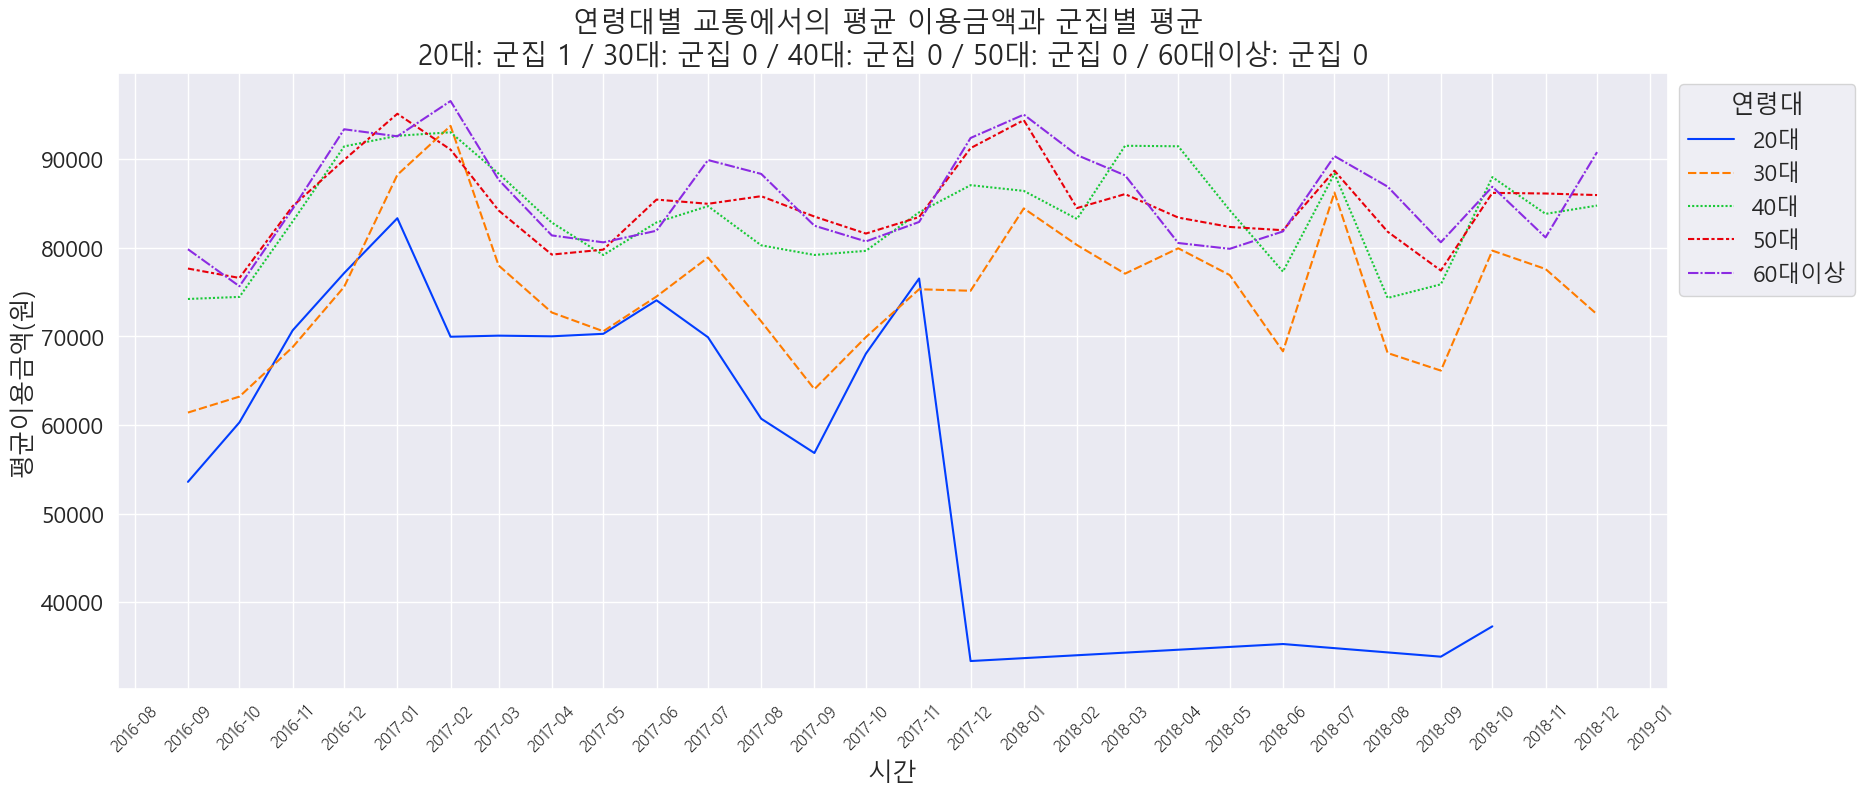

In [19]:
plot_market_agg(agg_DATA, marketType[0], km_list[0], pred_list[0])

C:\Users\user\AppData\Local\Temp\ipykernel_17640\509971295.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x='dtYearMonth', y="avgCost",


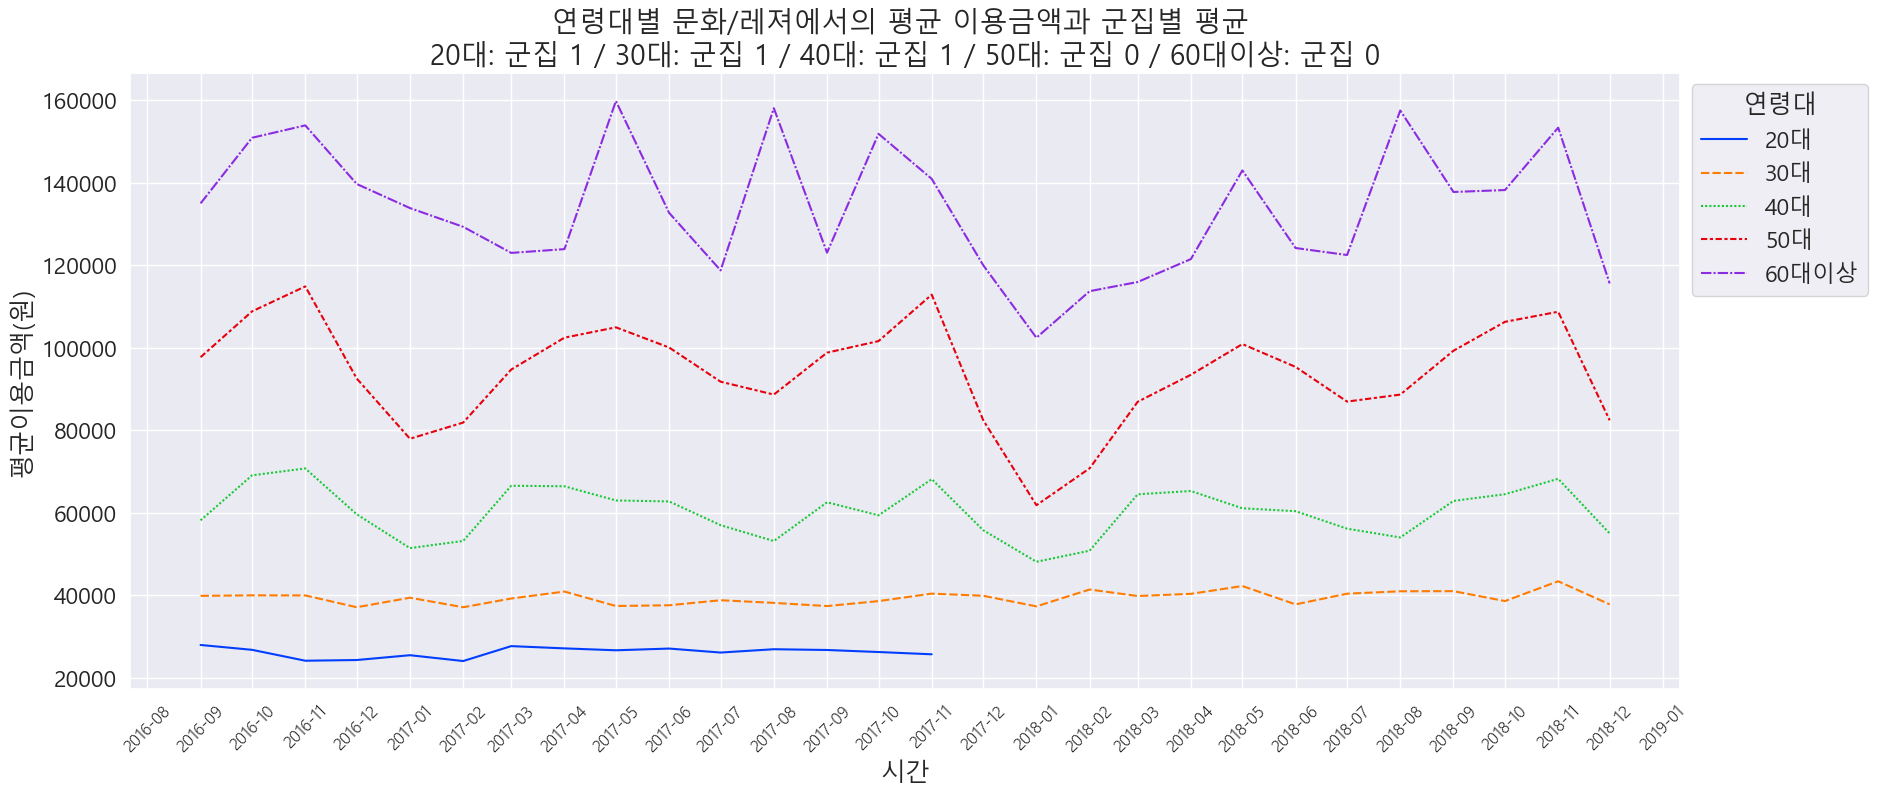

In [20]:
plot_market_agg(agg_DATA, marketType[1], km_list[1], pred_list[1])